<a href="https://colab.research.google.com/github/ckraju/mits/blob/master/mnist_convolutional_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
keras.__version__


Using TensorFlow backend.


'2.2.4'

11493376/11490434 [==============================] - 0s 0us/step


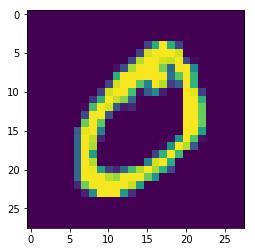

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt


#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#plot the first image in the dataset
plt.imshow(X_train[1])

X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

![Design layout of our experiment](https://drive.google.com/uc?id=1_HKSTo1I2S7I3c_A8K7TMCZFP38DpJP0)

![Design](https://drive.google.com/uc?id=18n4Pqqjt6bWNjUJU9utqaX52W2cfpcXk)

In [0]:
#check image shape
print ("Dimensions of X_train: ", X_train.shape)

print ("Dimension of the second element in X_train: ", X_train[1].shape)

Dimensions of X_train:  (60000, 28, 28, 1)
Dimension of the second element in X_train:  (28, 28, 1)


In [0]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#create model
model = Sequential()

#add model layers
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dense(10, activation="softmax"))

W0615 08:55:29.511858 140033292425088 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0615 08:55:29.548645 140033292425088 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0615 08:55:29.557892 140033292425088 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0615 08:55:29.584921 140033292425088 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimzer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
import numpy as np
trainingset = np.vstack ((X_train, X_test))
traininglabels = np.vstack ((y_train, y_test))

In [0]:
#train the model
history = model.fit(trainingset, traininglabels, validation_split=0.2, epochs=3, batch_size=32)

Train on 56000 samples, validate on 14000 samples
Epoch 1/3
56000/56000 [==============================] - 9s 161us/step - loss: 6.4685e-04 - acc: 0.9998 - val_loss: 0.0092 - val_acc: 0.9985
Epoch 2/3
56000/56000 [==============================] - 9s 153us/step - loss: 6.7841e-04 - acc: 0.9998 - val_loss: 0.0110 - val_acc: 0.9982
Epoch 3/3
56000/56000 [==============================] - 9s 154us/step - loss: 4.9221e-04 - acc: 0.9999 - val_loss: 0.0111 - val_acc: 0.9984


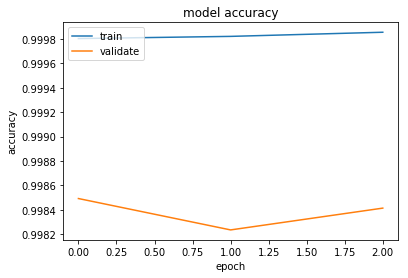

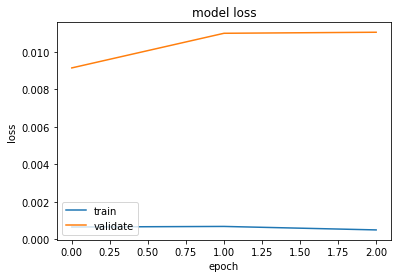

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='lower left')
plt.show()

In [0]:
test_loss, test_acc = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 60us/step


In [0]:
test_acc

0.9983599964141846

In [0]:
import matplotlib.pyplot as plt
print (history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [0]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[1.10476231e-34, 4.08920417e-18, 4.00124711e-19, 4.45361520e-17,
        3.92803311e-27, 3.89621598e-27, 0.00000000e+00, 1.00000000e+00,
        5.06341835e-26, 5.88262412e-23],
       [7.07123319e-24, 4.51728132e-25, 1.00000000e+00, 2.87948824e-24,
        2.18375590e-33, 1.03216985e-35, 3.45964570e-28, 2.75106973e-22,
        9.29046562e-30, 6.35557653e-34],
       [3.14912445e-24, 1.00000000e+00, 1.33552598e-16, 8.21770900e-25,
        2.08635802e-23, 2.71328771e-23, 1.47023677e-19, 5.21634620e-17,
        1.23539020e-24, 1.18345840e-24],
       [1.00000000e+00, 1.10658809e-20, 1.90766812e-15, 1.04215538e-21,
        4.67757631e-26, 8.84337379e-15, 1.90777841e-14, 1.97215465e-15,
        1.62259590e-16, 4.04800603e-14]], dtype=float32)

In [0]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

[Source for the experiment](https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5)
[Optimizer](https://emiliendupont.github.io/2018/01/24/optimization-visualization/)
